In [1]:
from helpers import *

0
1


C:\Users\thomas\AppData\Local\Temp\ipykernel_9712\4161470669.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  energy[theta][phi] = integrate.simps(flux, dx=3600)  # storing energy in a 2D array


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
Maximum energy produced at Theta = 51 degrees and Phi = 181 degrees


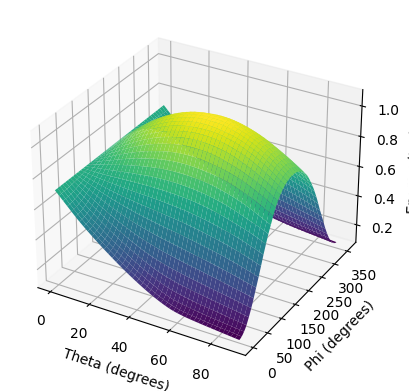

In [2]:
energy = np.zeros((91, 360))
solpos = get_solar_position("2023-01-01", "2023-12-31",LATITUDE, LONGTITUDE, ALTITUDE, "Europe/Copenhagen")
for theta in range(91):  # for each theta from 0 to 90 degrees
    print(theta)
    for phi in range(360):  # for each phi from 0 to 359 degrees
        flux = solar_flux(1, 1, 1100, 0.5, theta, phi, solpos)
        energy[theta][phi] = integrate.simps(flux, dx=3600)  # storing energy in a 2D array


#Plotting the 3D plot of energy
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for theta and phi
theta, phi = np.meshgrid(np.arange(0, 91), np.arange(0, 360), indexing='ij')
ax.plot_surface(theta, phi, energy, cmap='viridis')

ax.set_xlabel('Theta (degrees)')
ax.set_ylabel('Phi (degrees)')
ax.set_zlabel('Energy (Joules)')

max_energy_index = np.unravel_index(np.argmax(energy, axis=None), energy.shape)
print(f"Maximum energy produced at Theta = {max_energy_index[0]} degrees and Phi = {max_energy_index[1]} degrees")

In [33]:
prices = pd.read_json("Elspotprices.json")
prices = prices[prices.PriceArea == "DK2"]
prices["HourDK"] = pd.to_datetime(prices["HourDK"])
prices["HourUTC"] = pd.to_datetime(prices["HourUTC"])
prices.sort_values(by=["HourDK","HourUTC"])
price_arr = np.array(prices["SpotPriceDKK"] / 3600000000)

0
1


C:\Users\thomas\AppData\Local\Temp\ipykernel_9712\4246077744.py:8: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  energy[theta][phi] = integrate.simps(price, dx=3600)  # storing energy in a 2D array


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
Maximum energy produced at Theta = 58 degrees and Phi = 203 degrees


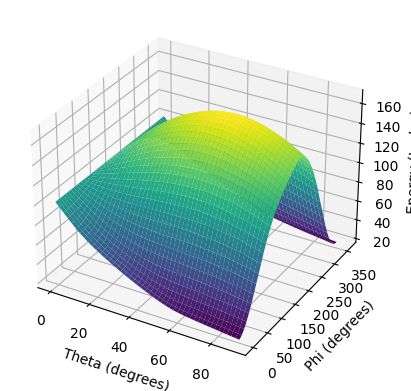

In [34]:
energy = np.zeros((91, 360))
solpos = get_solar_position("2023-01-01", "2023-12-31",LATITUDE, LONGTITUDE, ALTITUDE, "Europe/Copenhagen")
for theta in range(91):  # for each theta from 0 to 90 degrees
    print(theta)
    for phi in range(360):  # for each phi from 0 to 359 degrees
        flux = solar_flux(1, 1, 1100, 0.5, theta, phi, solpos)
        price = flux * price_arr
        energy[theta][phi] = integrate.simps(price, dx=3600)  # storing energy in a 2D array


#Plotting the 3D plot of energy
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for theta and phi
theta, phi = np.meshgrid(np.arange(0, 91), np.arange(0, 360), indexing='ij')
ax.plot_surface(theta, phi, energy, cmap='viridis')

ax.set_xlabel('Theta (degrees)')
ax.set_ylabel('Phi (degrees)')
ax.set_zlabel('Energy (Joules)')

max_energy_index = np.unravel_index(np.argmax(energy, axis=None), energy.shape)
print(f"Maximum energy produced at Theta = {max_energy_index[0]} degrees and Phi = {max_energy_index[1]} degrees")